# Logistic Regression 기반 질병 예측 모델링

<br>

* **목차**
    1. [Import Data & Python Packages](#t1.)
    2. [data & quality check](#t2.)
    3. [Exploratory Data Analysis](#t3.)
    2. [Feature Engineering](#t4.)
    3. [Modeling](#t5.)



<a id="t1."></a>
# 1. Import Data & Python Packages

In [1]:
# General Library
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ml
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.preprocessing import MinMaxScaler


# 한글 오류 해결
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Data Import
df = pd.read_csv('heart.csv')

<a id="t2."></a>
# 2. data & quality check

In [3]:
# data check

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# check data size

print("전체 column의 개수 :%d" %df.shape[1])
print("전체 row의 개수 :%d" %df.shape[0])

전체 column의 개수 :14
전체 row의 개수 :303


In [5]:
# check missing value

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<a id="t3."></a>
# 3. Exploratory Data Analysis

* <b> Variables</b> : <br><br>

    * 인구통계학적 요인 
        * age(나이) , 수치형 
        * sex(성별) , 범주형 , (1=남성, 0=여성)
        
    * 의학적 요인 
        * cp(가슴 통증 유형) , 범주형 , (가슴 통증 유형 0,1,2,3,4)
        * fbs(공복혈당),  범주형, (>120mg/dl 1=True, 0=False)
        * restecg(안정 심전도 결과), 범주형, (0,1,2)
        * thal(결함 해결가능 여부), 범주형, (3=보통, 6=해결된 결함, 7=해결가능한 결함)
        * trestbps(안정 혈압), 수치형 , (병원 입원시 mm Hg)
        * chol(혈청 콜레스테롤), 수치형, (mg/dl)
        * thalach(최대 심장 박동수), 수치형
        * oldpeak(비교적 안정되기까지 운동으로 유발되는 ST depression), 수치형
        * slope(최대 운동 ST segment의 기울기), 수치형
        * ca(형광 투시된 주요 혈관의 수, 수치형, (0~3)



In [6]:
# 데이터를 1차로 연속형과 범주형으로 구분

numeric = ['age','trestbps','chol','thalach','oldpeak','slope','ca']
category = ['sex','cp','fbs','restecg','exang','thal']

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# target 변수의 비율

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

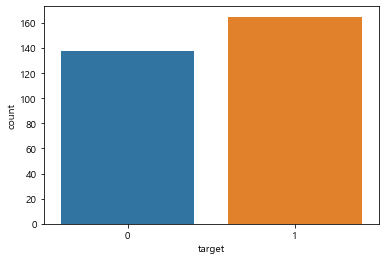

In [9]:
sns.countplot(x='target',data=df)

<b>종속변수인 질병유무의 경우전체 303개의 데이터중 심장병 심장병 진단받은 대상은 165, 진단받지 않은 대상은 138개이다.</b>

<Figure size 720x288 with 0 Axes>

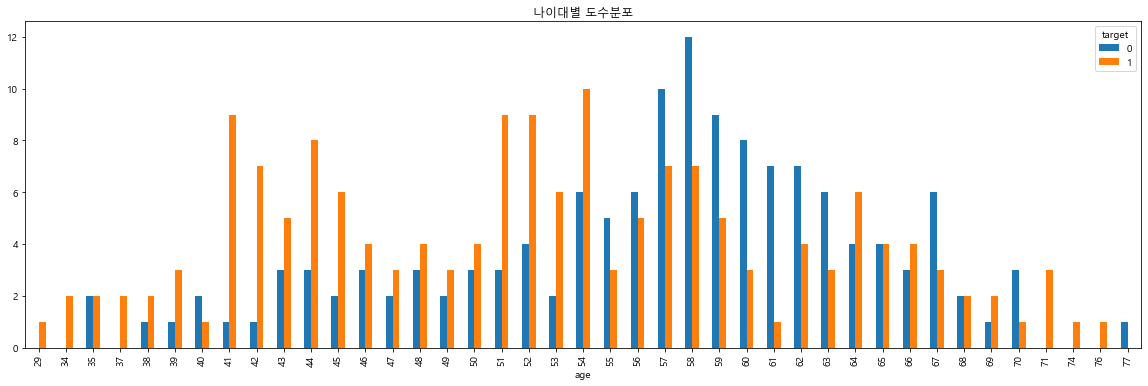

In [10]:
plt.figure(figsize=(10,4))

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))

plt.title('나이대별 도수분포')
plt.show()

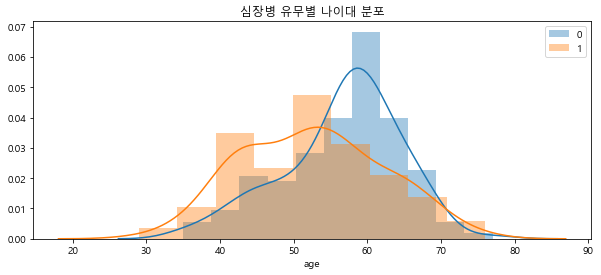

In [11]:
plt.figure(figsize=(10,4))

sns.distplot(df[df.target == 0]['age'],label='0')
sns.distplot(df[df.target == 1]['age'],label='1')

plt.legend()
plt.title('심장병 유무별 나이대 분포')
plt.show()

<b>심장병 진단 대상의 경우 40 ~ 50대에 높게 분포하며, 진단자가 아닌경우 50 ~ 70대에 걸쳐 높게 분포하는것을 확인</b>

In [12]:
# visualization module

## 시각화 함수 생성
def bar_chart(feature,label):
    yes_heart = df[df.target == 1][feature].value_counts()
    no_heart = df[df.target == 0][feature].value_counts()  
    plt_df = pd.DataFrame([yes_heart,no_heart])
    plt_df.index = ['yes_heart','no_heart']
    
    plt_df.plot(kind='bar',stacked=True,figsize=(12,6),title='심장병 유무에 따른 %s변수 빈도'%feature).legend(label,title=(feature))
    
    return plt_df

,1,0
yes_heart,93,72
no_heart,114,24


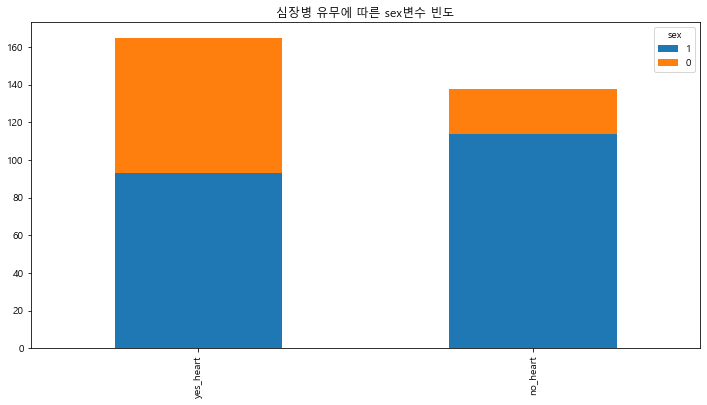

In [13]:
bar_chart('sex',['1','0'])

<b>심장병 진단 대상자의 경우 그렇지 않은 경우에 비해 여성이 차지하는 비율이 높음</b>

,0,1,2,3
yes_heart,39,41,69,16
no_heart,104,9,18,7


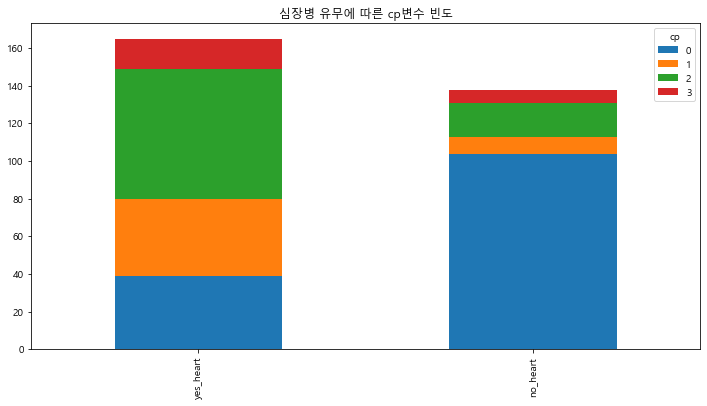

In [14]:
# cp(가슴통증유형)
bar_chart('cp',['0','1','2','3','4'])

<b> 가슴통증유형의 경우 진단대상자의 경우 대상자가 아닌경우에 비해 '2','1' 유형이 많은것을 확인 </b>

,0,1
yes_heart,142,23
no_heart,116,22


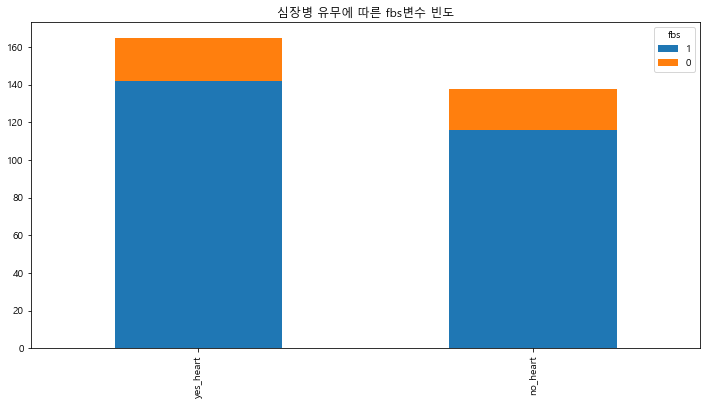

In [15]:
# fbs(공복혈당수치 >120 True,False)
bar_chart('fbs',['1','0'])

<b>fbs(공복혈당) 변수의 경우 심장병 유무에 따른 빈도 차이가 크지 않음</b>

,0,1,2
yes_heart,68,96,1
no_heart,79,56,3


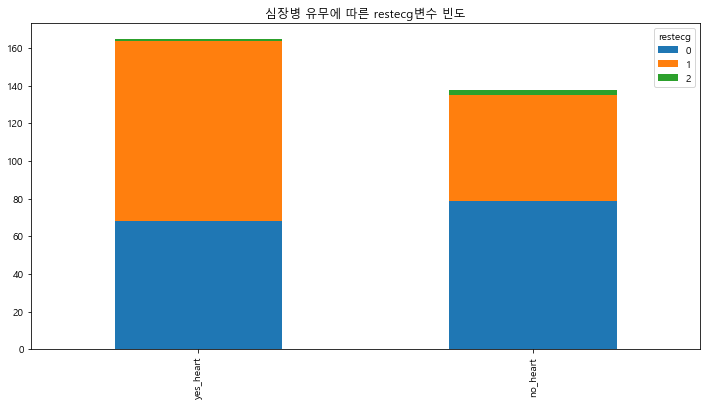

In [16]:
# restecg(안정 심전도 결과)
bar_chart('restecg',['0','1','2'])

<b>안정 심전도 결과 심장병 진단 대상자의 경우 '1'유형의 빈도가 가장 높으며, 대상자가 아닌 경우 '0'유형의 빈도수가 가장 높다 <br>
질병 유무에 관계없이 '2'유형의 빈도는 매우 낮다 </b>

,0,1
yes_heart,142,23
no_heart,62,76


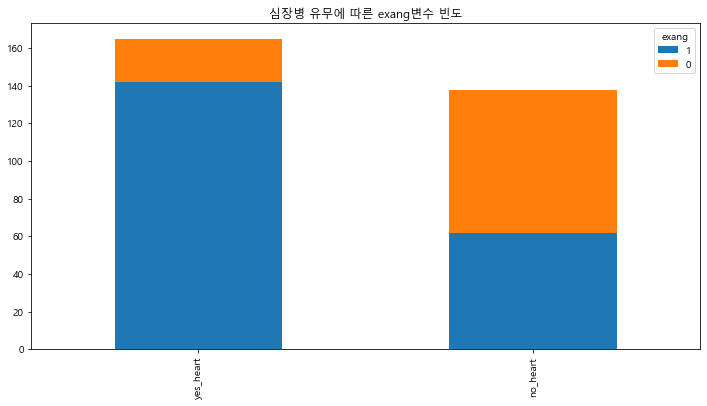

In [17]:
# exang(협심증 유발운동 여부, True=1, False=0)
bar_chart('exang',['1','0'])

<b>심장병 진단 대상의 경우 협심증 유발 운동을 한 경우가 대상자가 아닌 경우에 비해 월등히 많음</b>

,0,1,2,3
yes_heart,1,6,130,28
no_heart,1,12,36,89


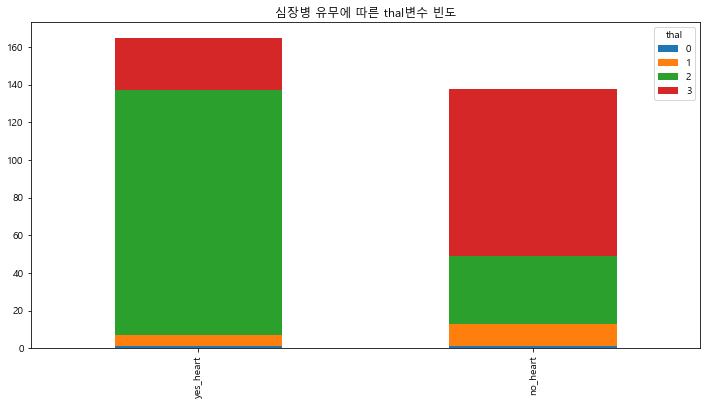

In [18]:
# thal(결함 해결가능 여부, 0,1,2,3)
bar_chart('thal',['0','1','2','3'])

<b>결함 해결가능 여부의 경우 '2'유형의 빈도가 심장병 진단 대상자의 경우 가장 높음</b>

<b>slope와 ca변수의 경우 수치형 데이터이지만, 각 변수별 범주가 0,1,2와 0,1,2,3으로 정해져있기 때문에 순위를 갖는 명목형 변수로 취급 </b>

In [19]:
numeric = ['age','trestbps','chol','thalach','oldpeak']
category = ['sex','cp','fbs','restecg','exang','thal','slope','ca']

,0,1,2
yes_heart,9,49,107
no_heart,12,91,35


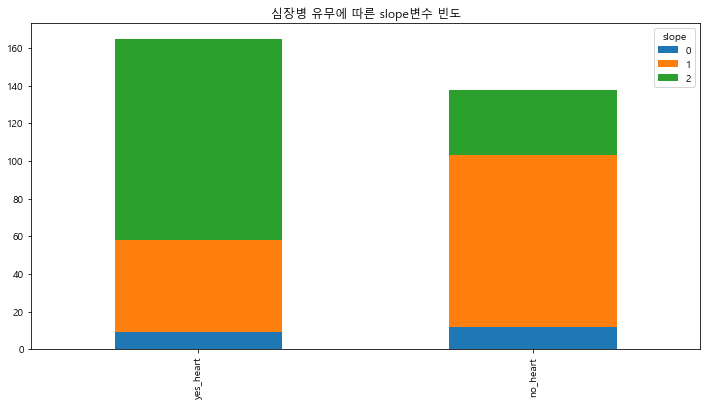

In [20]:
# slope(최대 운동 기울기)
bar_chart('slope',['0','1','2'])

<b>심장병 진단 대상의 경우 기울기 '2'에 가장 많은 빈도를 보임 이에 반해 진단 대상자가 아닌 경우 기울기 '1'에 가장 많은 빈도를 보임</b>

,0,1,2,3,4
yes_heart,130,21,7,3,4
no_heart,45,44,31,17,1


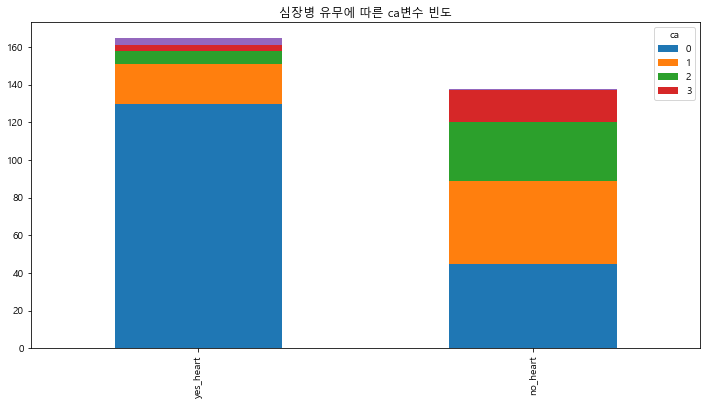

In [21]:
# ca(형광 투시된 주요 혈관의 수)
bar_chart('ca',['0','1','2','3'])

<b>ca변수의 경우 심장병 진단 대상의 경우 '0'에 가장 많은 빈도를 보임 <br>
ca변수의 경우 형광 투시된 혈관이 보이는지와 보이지 않는지 여부로 분류할 필요  </b>

In [22]:
df['ca'] = np.where(df['ca']==0,1,0)

df['ca'].value_counts()

1    175
0    128
Name: ca, dtype: int64

Text(0.5, 1.0, '심장병 유무별 thalach(최대 심장박동수)')

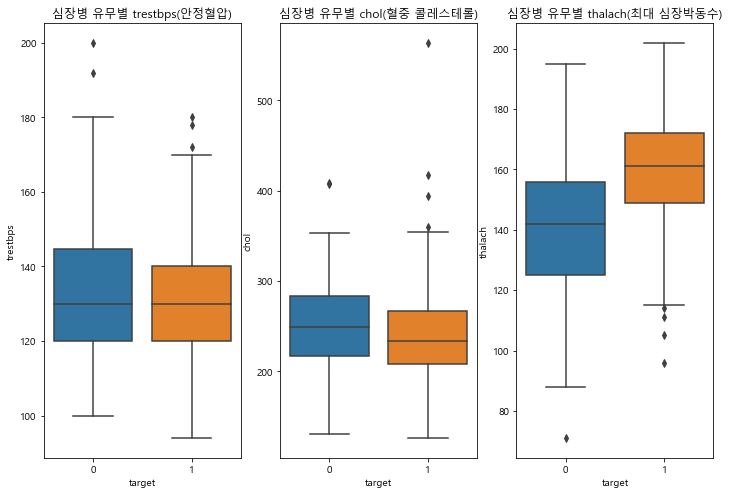

In [23]:
plt.figure(figsize=(12,8))

ax1 = plt.subplot(131)
ax1 = sns.boxplot(x=df.target, y=df.trestbps, data=df)
ax1.set_title('심장병 유무별 trestbps(안정혈압)')

#####################################################

ax2 = plt.subplot(132)
ax2 = sns.boxplot(x=df.target, y=df.chol, data=df)
ax2.set_title('심장병 유무별 chol(혈중 콜레스테롤)')

#####################################################

ax3 = plt.subplot(133)
ax3 = sns.boxplot(x=df.target, y=df.thalach, data=df)
ax3.set_title('심장병 유무별 thalach(최대 심장박동수)')

<a id="t4."></a>
# 4. Feature Engineering

범주형 변수들('sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'slope', 'ca')들을 더미변수로 바꿔야함

In [24]:
# category => dummies

def get_dummies(feature): # input feature list
    
    global df
    
    t_list = []
    for i in feature:
        t = pd.get_dummies(df[i],prefix=i)
        t_list.append(t)
        
    result_df = df[numeric].join(t_list)
    result_df['target'] = df['target'] 
    # 기준변수 제거
    result_df.drop('sex_0',axis=1,inplace=True)
    result_df.drop('cp_0',axis=1,inplace=True)
    result_df.drop('fbs_0',axis=1,inplace=True)
    result_df.drop('restecg_0',axis=1,inplace=True)
    result_df.drop('exang_0',axis=1,inplace=True)
    result_df.drop('thal_0',axis=1,inplace=True)
    result_df.drop('slope_0',axis=1,inplace=True)
    result_df.drop('ca_0',axis=1,inplace=True)
    
    return result_df

get_dummies 함수 실행 및 실행결과

In [25]:
# get_dummies

dummy_list = category

result_df = get_dummies(dummy_list)

In [26]:
result_df

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,thal_1,thal_2,thal_3,slope_1,slope_2,ca_1,target
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0
299,45,110,264,132,1.2,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0
300,68,144,193,141,3.4,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0
301,57,130,131,115,1.2,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0


수치형 변수들('age','trestbps','chol','thalach','oldpeak')들의 값의 범위가 서로 다르기 때문에 모델에 영향을 줄 가능성이 존재한다. 따라서 MinMax Scaler를 통하여 수치형 변수들의 scale을 조정해주어야 한다.

In [27]:
# scaling

scaler = MinMaxScaler() # MinMax Scaler(0~1)

# 수치형 변수 scaling
scaled = scaler.fit_transform(result_df[['age','trestbps','chol','thalach','oldpeak']])

# scaling 된 데이터 numpy.array -> dataFrame으로 변환
scaled_df = pd.DataFrame(scaled,columns=['age','trestbps','chol','thalach','oldpeak'], index=result_df.index)

# 전체 dataFrame으로 
result_df = scaled_df.join(result_df.iloc[:,5:])

In [28]:
result_df.iloc[:,:-1].columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'thal_1',
       'thal_2', 'thal_3', 'slope_1', 'slope_2', 'ca_1'],
      dtype='object')

* 변수 탐색 및 선정
    
RFE (Recursive feature elimination) 재귀적 특성 제거를 활용하여 최적 변수 선택

독립변수의 최적개수 : 13
최적 독립변수 : ['trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'exang_1', 'thal_3', 'slope_1', 'slope_2', 'ca_1']


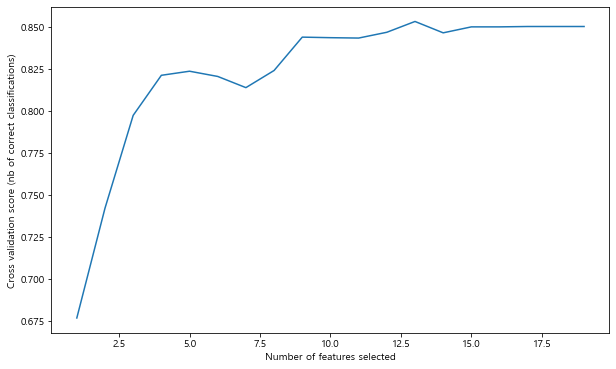

In [29]:
# search optimal parameter

X = result_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'thal_1',
       'thal_2', 'thal_3', 'slope_1', 'slope_2', 'ca_1']]
y = result_df['target']

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("독립변수의 최적개수 : %d" % rfecv.n_features_)
print('최적 독립변수 : %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

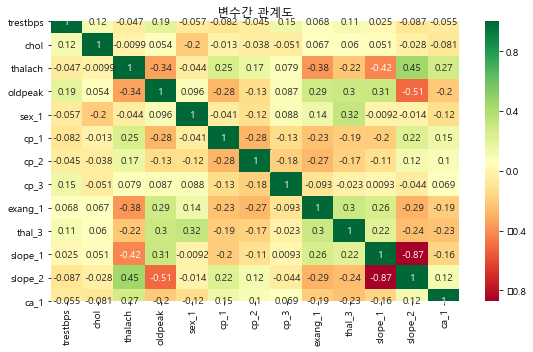

In [30]:
Selected_features = ['trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1', 'cp_2', 'cp_3',
                     'exang_1', 'thal_3', 'slope_1', 'slope_2', 'ca_1']

X = result_df[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")

plt.title("변수간 관계도")
plt.tight_layout()
plt.show()

* Train / Test 데이터 분할

전체 데이터 중 20%데이터를 검증용 데이터로 분할

In [31]:
# split train / test

dependent_variable = result_df['target']
independent_variables = result_df[Selected_features]
x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2, random_state=0)

<a id="t5."></a>
# 5. Modeling & Model evaluation

In [32]:
# LogisticRegression 모델 생성
lr_model = LogisticRegression()

# 학습
lr_model.fit(x_train,y_train)

# score
print('학습용 데이터셋 정확도 : %.2f' % lr_model.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % lr_model.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.87
검증용 데이터셋 정확도 : 0.85


In [33]:
test_predicted = lr_model.predict(x_test)

print(confusion_matrix(y_test, test_predicted))

[[22  5]
 [ 4 30]]


모델은 87%의 결과를 가지며, confusion_matrix를 통해 살펴보면 총 52개의 예측데이터중 9개의 오차가 발생한것을 알수있다 

각 독립변수가 분류결정에 영향을 미치는 정도를 알아보기 위해서는 'odds ratio'를 통해 파악해야한다. <br>
이 오즈비를 구하기 위하여 stats 라이브러리를 활용한다.

In [34]:
# get odd's ratio

# 상수항 추가
independent_variables_with_constant = sm.add_constant(independent_variables,prepend=True) ##

result = sm.Logit(dependent_variable, independent_variables_with_constant).fit_regularized()
result.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.31276114426665236
            Iterations: 110
            Function evaluations: 110
            Gradient evaluations: 110


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Thu, 19 Dec 2019   Pseudo R-squ.:                  0.5462
Time:                        23:21:22   Log-Likelihood:                -94.767
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.207e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7207      1.398      0.515      0.606      -2.019       3.461
trestbps      -2.1950      1.129     -1.944      0.052      -4.408       0.018
chol          -1.9700      1.684     -1.170      0.242      -5.270       1.330
thalach        1.7549      1.359      1.291      0.197      -0.909       4.419
oldpeak       -3.1708      1.392     -2.279      0.023      -5.898      -0.443
sex_1         -1.6057      0.506     -3.174      0.002      -2.597      -0.614
cp_1           1.0932      0.575      1.902      0.057      -0.033       2.219
cp_2           2.1737      0.494      4.398      0.000       1.205       3.142
cp_3           2.2372      0.665      3.366      0.001       0.934       3.540
exang_1       -0.7249      0.434     -1.670      0.095      -1.576       0.126
thal_3        -1.3177      0.400     -3.294      0.001      -2.102      -0.534
slope_1       -0.7537      0.850     -0.886      0.375      -2.420       0.913
slope_2        0.4363      0.909      0.480      0.631      -1.345       2.218
ca_1           2.2237      0.418      5.325      0.000       1.405       3.042
==============================================================================
"""

유의계수(p-value)의 경우, 'oldpeak','sex_1','cp_2','cp_3','thal_3','ca_1'가 p<0.05이내로 유의한 변수임을 확인할 수 있다 <br>
이어서 odds ratio를 확인해 보면,

In [35]:
np.exp(result.params[(round(result.pvalues,3) <= 0.05) == True])

oldpeak    0.041969
sex_1      0.200758
cp_2       8.791139
cp_3       9.367264
thal_3     0.267755
ca_1       9.241512
dtype: float64

* 결과해석

모델은 87%의 정확도를 가지며,

다른 모든 변수가 동일하다는 가정하에, 'oldpeak'가 한단위 증가할때마다 심장병 진단 확률이 0.04배 증가한다. <br>
여성일 경우 남성에 비해 심장병 진단 확률이 0.2배 증가한다. <br>
cp_2,cp_3의 경우 cp_0에 비해 심장병 진단 확률이 각 8.7배,9.3배 증가한다. <br>
thal_3의 경우 thal_0에 비해 심장병 진단 확률이 0.26배 증가한다. <br>
ca_1의 경우 ca_0에 비해 심장병 진단 확률이 9.24배 증가한다.